<a href="https://colab.research.google.com/github/Anna9288/projects/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/archive(14).zip")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
df['work_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object>

In [ ]:
df['ever_married'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object>

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
import seaborn as sns
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


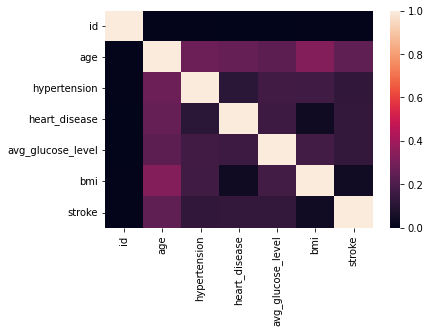

In [ ]:
sns.heatmap(df.corr())

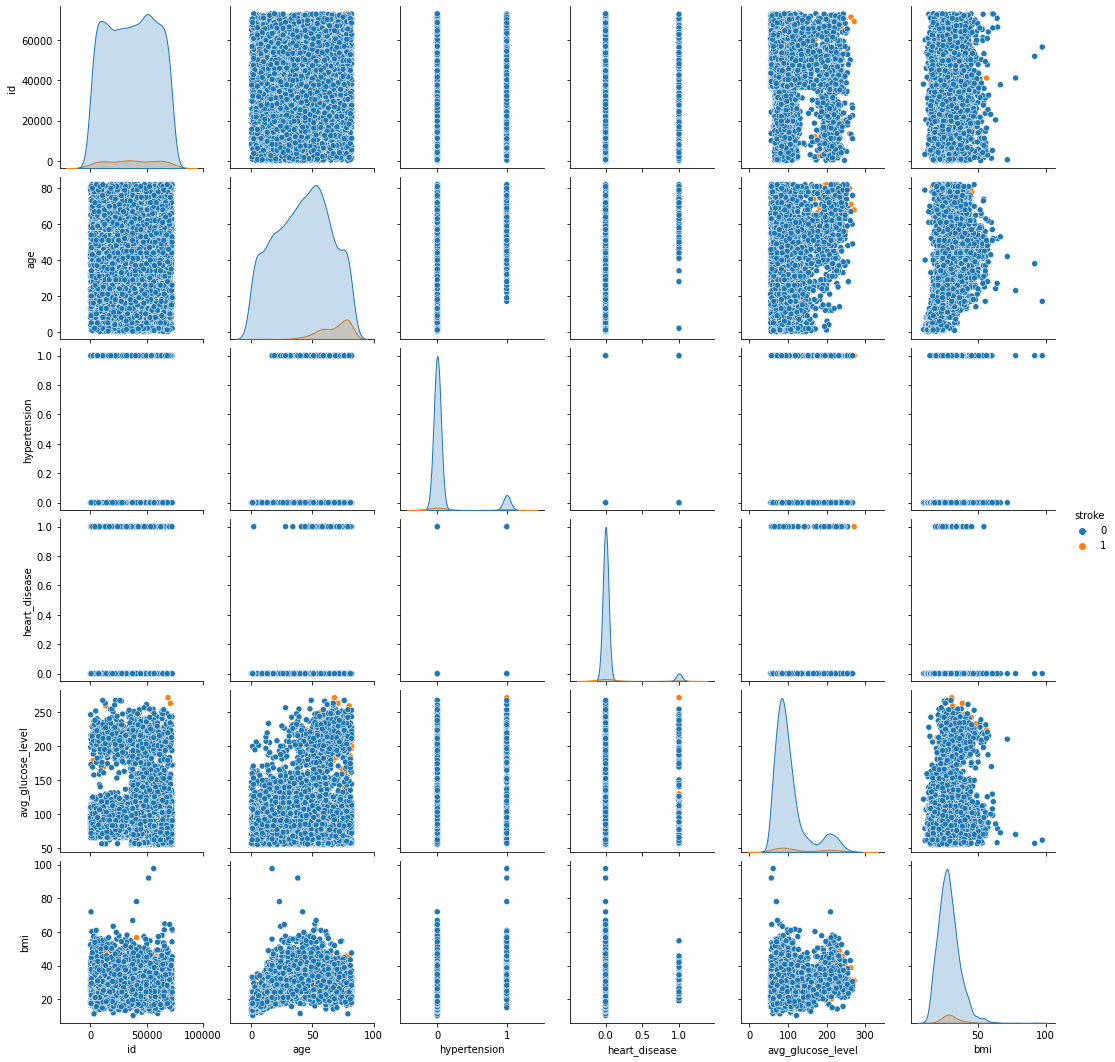

In [ ]:
sns.pairplot(df,hue='stroke')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


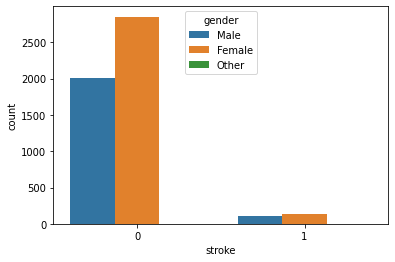

In [ ]:
sns.countplot('stroke',data=df,hue='gender')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


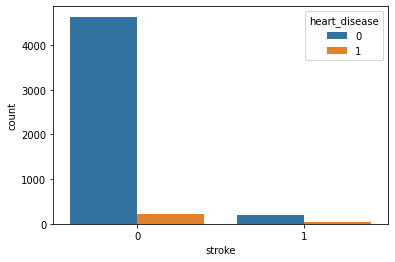

In [ ]:
sns.countplot('stroke',data=df,hue='heart_disease')

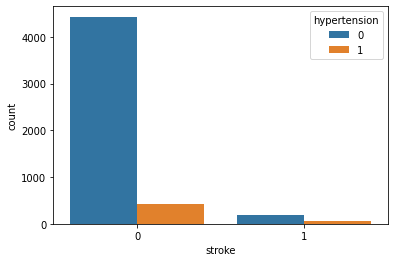

In [ ]:
sns.countplot('stroke',data=df,hue='hypertension')

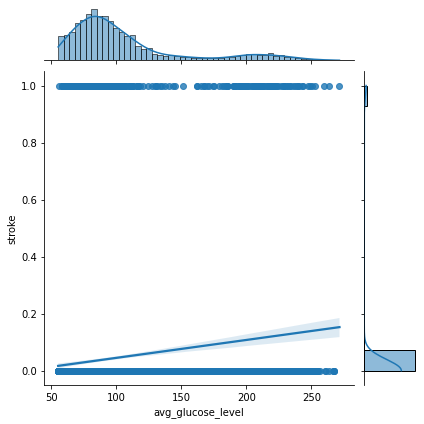

In [ ]:
sns.jointplot(x='avg_glucose_level',data=df,y='stroke',kind='reg')

(array([ 885.,    0.,    0., 1892.,    0.,    0.,  789.,    0.,    0.,
        1544.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

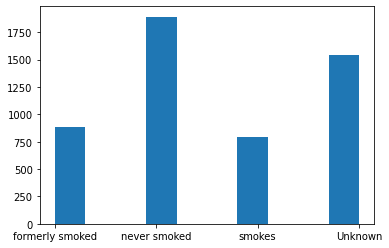

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['smoking_status'])


(array([3353.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1757.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

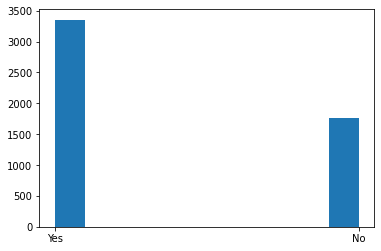

In [ ]:
plt.hist(df['ever_married'])

(array([2596.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2514.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

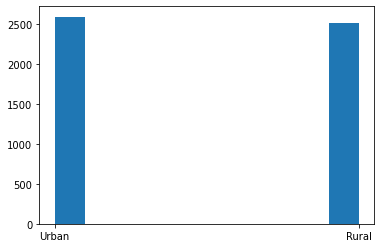

In [ ]:
plt.hist(df['Residence_type'])

In [ ]:
dum=pd.get_dummies(df[['gender','ever_married','work_type','Residence_type','smoking_status']],drop_first=True)
dum

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,1,0,0,1,0,1,0
5106,0,0,1,0,0,1,0,1,0,1,0
5107,0,0,1,0,0,1,0,0,0,1,0
5108,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
df1=pd.concat([df,dum],axis=1)
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,...,0,1,0,1,0,0,1,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,...,0,1,0,0,1,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,...,0,1,0,0,1,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
df1.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status'],axis=1,inplace=True)
df1

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
df1.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                         uint8
gender_Other                        uint8
ever_married_Yes                    uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Urban                uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

In [ ]:
print(df1.isna().sum())

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Male                         0
gender_Other                        0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64


In [ ]:
df1['bmi']=df1['bmi'].fillna(df['bmi'].mean())

In [ ]:
print(df1.isna().sum())

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


In [ ]:
x=df1.drop(['stroke'],axis=1).iloc[:,:]
y=df1.iloc[:,5]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3897,4.00,0,0,90.42,16.2,1,0,0,0,0,0,1,0,0,0,0
576,29.00,0,0,207.58,22.8,1,0,0,0,1,0,0,1,0,0,1
4013,44.00,1,0,91.28,26.5,1,0,1,0,1,0,0,0,0,1,0
4536,68.00,1,0,150.74,40.3,0,0,1,0,1,0,0,1,0,0,0
1180,62.00,0,0,82.57,36.0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,43.00,0,0,88.00,30.6,1,0,1,0,0,0,0,0,0,1,0
466,61.00,1,0,170.05,60.2,0,0,1,0,1,0,0,0,0,0,1
3092,1.16,0,0,97.28,17.8,0,0,0,0,0,0,1,1,0,0,0
3772,80.00,0,0,196.08,31.0,1,0,1,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)
x_test

array([[-0.54751962, -0.31719928, -0.23946931, ..., -0.46547467,
        -0.77073246, -0.42396856],
       [-0.14777156, -0.31719928, -0.23946931, ..., -0.46547467,
         1.29746709, -0.42396856],
       [-1.569098  , -0.31719928, -0.23946931, ..., -0.46547467,
        -0.77073246, -0.42396856],
       ...,
       [-0.05893866, -0.31719928, -0.23946931, ..., -0.46547467,
         1.29746709, -0.42396856],
       [ 0.60730811, -0.31719928, -0.23946931, ..., -0.46547467,
        -0.77073246, -0.42396856],
       [ 0.74055746, -0.31719928, -0.23946931, ..., -0.46547467,
         1.29746709, -0.42396856]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clas=DecisionTreeClassifier()
clas.fit(x_train,y_train)
y_pred=clas.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
score=accuracy_score(y_test,y_pred)
score

0.9093281148075668

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95      1444\n           1       0.22      0.22      0.22        89\n\n    accuracy                           0.91      1533\n   macro avg       0.59      0.59      0.59      1533\nweighted avg       0.91      0.91      0.91      1533\n'